In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sz
import pandas as pd
import pandas as pd
from scapy.all import rdpcap
from tueplots import bundles
from tueplots.constants.color import rgb
from matplotlib.colors import LinearSegmentedColormap
import chardet
import binascii



In [4]:
df_all=pd.read_csv(r"C:\Users\Sarthak\Downloads\monday080124.csv")
df_all

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29040\4083201761.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all=pd.read_csv(r"C:\Users\Sarthak\Downloads\monday080124.csv")


,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,wlan.ssid
0,1,"Jan 8, 2024 10:59:03.696487000 Mitteleuropäis...",00:f6:63:81:c8:6e,ff:ff:ff:ff:ff:ff,802.11,286.0,4775657374
1,2,"Jan 8, 2024 10:59:03.705183000 Mitteleuropäis...",NaN,NaN,802.11,35.0,NaN
2,3,"Jan 8, 2024 10:59:03.705281000 Mitteleuropäis...",NaN,NaN,802.11,29.0,NaN
3,4,"Jan 8, 2024 10:59:03.705314000 Mitteleuropäis...",NaN,NaN,802.11,36.0,NaN
4,5,"Jan 8, 2024 10:59:03.705341000 Mitteleuropäis...",NaN,NaN,802.11,47.0,NaN
...,...,...,...,...,...,...,...
27741683,398012,"Jan 8, 2024 13:29:05.249678000 CET",NaN,NaN,802.11,NaN,NaN
27741684,398013,"Jan 8, 2024 13:29:05.249719000 CET",NaN,NaN,802.11,NaN,NaN
27741685,398014,"Jan 8, 2024 13:29:05.249804000 CET",NaN,NaN,802.11,NaN,NaN
27741686,398015,"Jan 8, 2024 13:29:05.249849000 CET",NaN,NaN,802.11,NaN,NaN


exploring data based on SSID's

C:\Users\Sarthak\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 0 ( ) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
) missing from current font.ming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 13 (
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sarthak\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 24 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sarthak\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 5 () missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sarthak\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129 (\x81) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sarthak\AppData\Roaming\Python\Python311\site-packages\IPython\

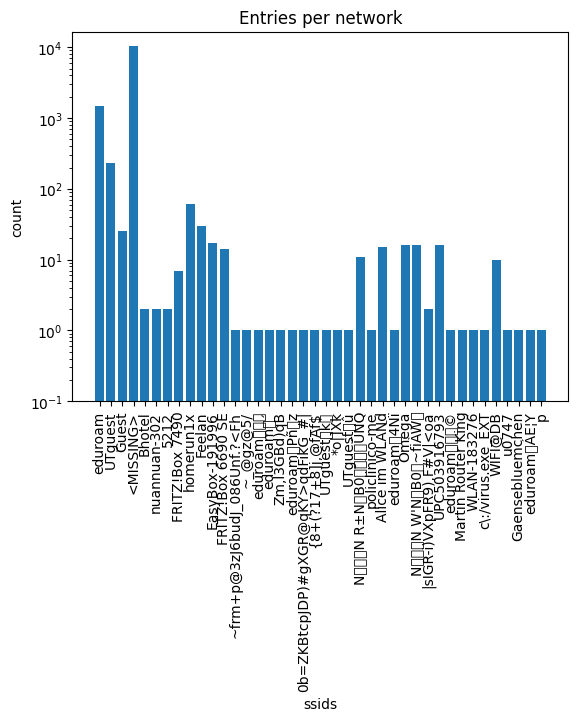

In [5]:
ssids_counts = df_all["wlan.ssid"].value_counts().reset_index()
ssids_counts.columns = ["wlan.ssid", "count"]

# Step 2: Group by WLAN SSID and count the number of unique entries in wlan.sa
unique_sa_counts = df_all.groupby("wlan.ssid")["wlan.sa"].nunique().reset_index()
unique_sa_counts.columns = ["wlan.ssid", "unique_sa_count"]

# Step 3: Merge the two DataFrames on "wlan.ssid"
result = pd.merge(ssids_counts, unique_sa_counts, on="wlan.ssid")
result = result.to_numpy()
# Conversion from hexadecimal to "human"
def hex_to_str(hex_str):
    if len(hex_str) % 2 != 0:
        return hex_str
    bytes_obj = binascii.unhexlify(hex_str)
    return bytes_obj.decode('latin-1')


vec_func = np.vectorize(hex_to_str)

result[:,0] = vec_func(result[:,0])
# This displays the first 40 ssids and their number of entries

names = result[:40, 0]
value = result[:40, 2].astype(int)

plt.bar(names, value)
plt.xlabel("ssids")
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.yscale("log")
plt.ylim(bottom=0.1)
plt.title("Entries per network")
plt.show()

we get the users on just one SSID network

In [6]:
print(hex_to_str("656475726f616d"))
df = df_all[df_all["wlan.ssid"] == "656475726f616d"]

eduroam


converting the time format to a processable one and dropping all na values in the source set to further clean the data

In [7]:
df["frame.time"] = df["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
df['frame.time'] = df['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET')
df['date-time'] = pd.to_datetime(df['frame.time'], format='%b %d, %Y %H:%M %Z', errors='coerce')
df['hour:minute'] = df['date-time'].dt.strftime('%H:%M')
df.dropna(subset=["wlan.sa"])

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29040\1430173376.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["frame.time"] = df["frame.time"].str.replace(r':\d+\.\d+', '', regex=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29040\1430173376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['frame.time'] = df['frame.time'].str.replace('Mitteleuropäische Zeit', 'CET')
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29040\1430173376.py:3: SettingWithCopyWarning: 
A value is trying to be set o

,frame.number,frame.time,wlan.sa,wlan.da,_ws.col.protocol,frame.len,wlan.ssid,date-time,hour:minute
9,10,"Jan 8, 2024 10:59 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336.0,656475726f616d,2024-01-08 10:59:00+01:00,10:59
12,13,"Jan 8, 2024 10:59 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336.0,656475726f616d,2024-01-08 10:59:00+01:00,10:59
17,18,"Jan 8, 2024 10:59 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336.0,656475726f616d,2024-01-08 10:59:00+01:00,10:59
20,21,"Jan 8, 2024 10:59 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336.0,656475726f616d,2024-01-08 10:59:00+01:00,10:59
60,61,"Jan 8, 2024 10:59 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,336.0,656475726f616d,2024-01-08 10:59:00+01:00,10:59
...,...,...,...,...,...,...,...,...,...
13870793,749883,"Jan 8, 2024 14:09 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,344.0,656475726f616d,2024-01-08 14:09:00+01:00,14:09
13870816,749906,"Jan 8, 2024 14:09 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,344.0,656475726f616d,2024-01-08 14:09:00+01:00,14:09
13870833,749923,"Jan 8, 2024 14:09 CET",00:f6:63:81:c8:6f,ff:ff:ff:ff:ff:ff,802.11,344.0,656475726f616d,2024-01-08 14:09:00+01:00,14:09
13870834,749924,"Jan 8, 2024 14:09 CET",a0:59:50:3a:9c:74,ff:ff:ff:ff:ff:ff,802.11,165.0,656475726f616d,2024-01-08 14:09:00+01:00,14:09


filtering data for mac unique MAC's first and last appreances.

1470
1470


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


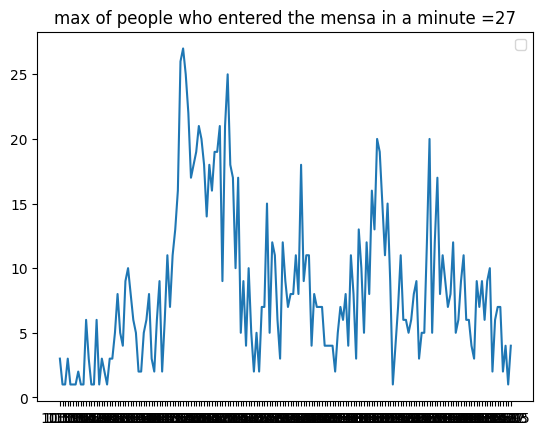

In [8]:
df_first = df.drop_duplicates(subset='wlan.sa', keep='first')
df_last = df.drop_duplicates(subset='wlan.sa', keep='last')
print(df_first["wlan.sa"].nunique())
print(df_last["wlan.sa"].nunique())
f=plt.plot(df_first["hour:minute"].value_counts().sort_index())
max_ent=max(df_first["hour:minute"].value_counts().sort_index())
plt.title("max of people who entered the mensa in a minute ={x}".format(x=max_ent))
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


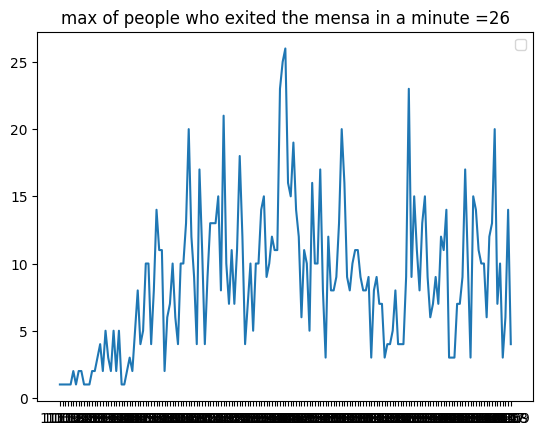

In [9]:
max_ext=max(df_last["hour:minute"].value_counts().sort_index())
l=plt.plot(df_last["hour:minute"].value_counts().sort_index())
plt.title("max of people who exited the mensa in a minute ={x}".format(x=max_ext))
plt.legend()

we check how many mac addresses were seen for the first and the last time in the network per minute.

Text(0.5, 1.0, 'New MAC id seen in the network Count/ minute')

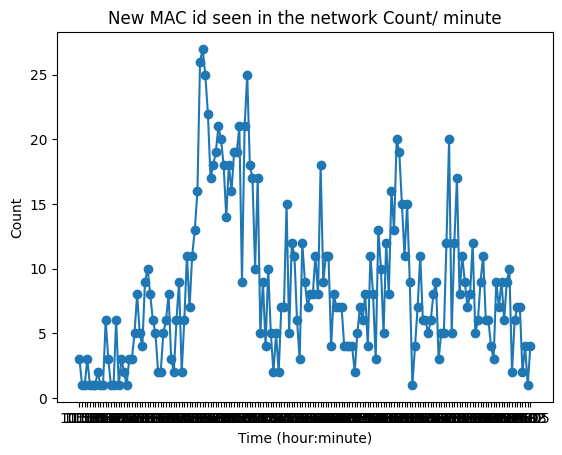

In [10]:
per_min_new=pd.DataFrame(df_first["hour:minute"].value_counts().sort_index())
plt.plot(per_min_new['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('New MAC id seen in the network Count/ minute')

Text(0.5, 1.0, 'last seen unique MAC id seen in the network Count/ minute')

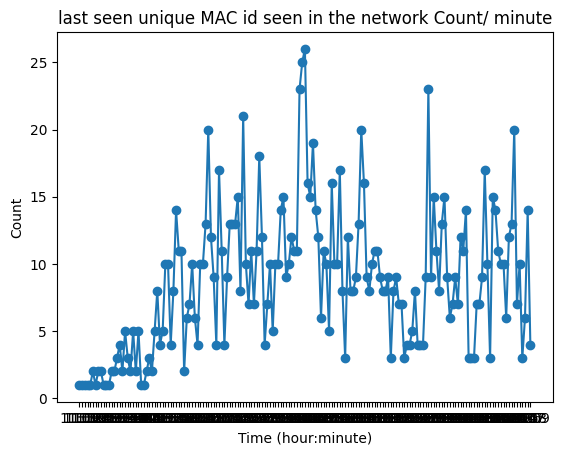

In [11]:
per_min_last=pd.DataFrame(df_last["hour:minute"].value_counts().sort_index())
plt.plot(per_min_last['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('last seen unique MAC id seen in the network Count/ minute')

how many mac addresses were seen for the first and the last time in the network at 5 min time intervals

Text(0.5, 1.0, 'first seen Count / 5 min')

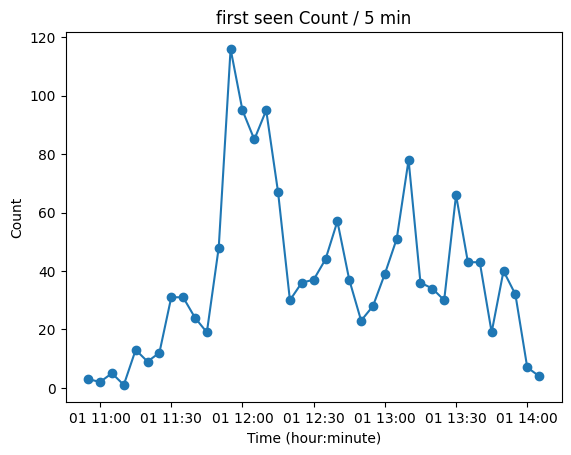

In [12]:
_5min_new = pd.DataFrame({'hour:minute':per_min_new.index.tolist(),'count': per_min_new["count"]})
_5min_new['hour:minute'] = pd.to_datetime(_5min_new['hour:minute'], format='%H:%M')
_5min_new['hour:minute'].dt.strftime('%H:%M')
_5min_new.set_index('hour:minute',inplace=True)
_5min_new_ = _5min_new.resample('5T').sum()
#_5min_new_
plt.plot(_5min_new_['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('first seen Count / 5 min')

Text(0.5, 1.0, 'last seen Count / 5 min')

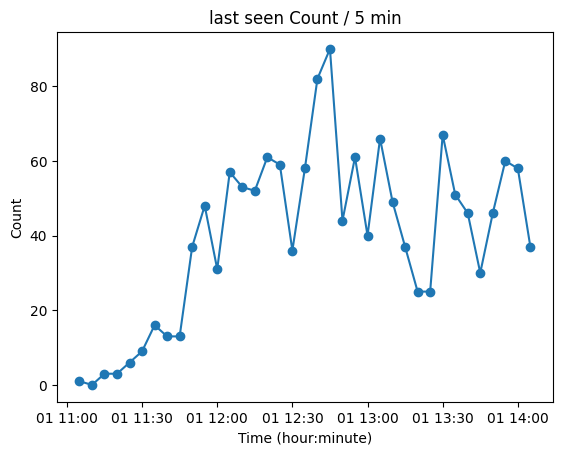

In [13]:
_5min_last = pd.DataFrame({'hour:minute':per_min_last.index.tolist(),'count': per_min_last["count"]})
_5min_last['hour:minute'] = pd.to_datetime(_5min_last['hour:minute'], format="%H:%M")
_5min_last.set_index('hour:minute', inplace=True)
last_per5min_ = _5min_last.resample('5T').sum()
#last_per5min_
plt.plot(last_per5min_['count'], marker='o')
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.title('last seen Count / 5 min')

total number of users seen during a day based on MAC id's number of people present in the mensa at a particular time

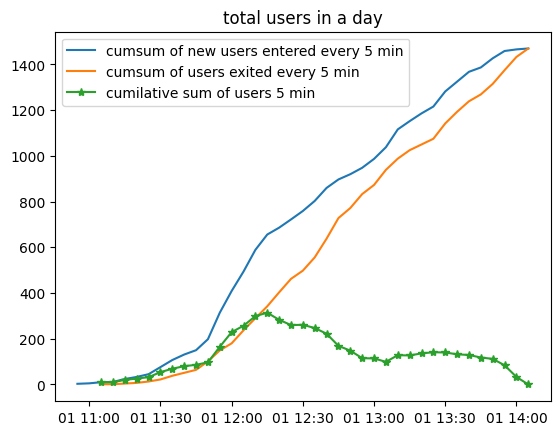

In [14]:
np.cumsum(_5min_new_['count'])
plt.plot(np.cumsum(_5min_new_['count']),label="cumsum of new users entered every 5 min")
plt.plot(np.cumsum(last_per5min_['count']),label="cumsum of users exited every 5 min")
plt.plot(np.cumsum(_5min_new_['count'])-np.cumsum(last_per5min_['count']), marker='*',label="cumilative sum of users 5 min")
plt.title("total users in a day")
plt.legend()

lookinng at the difference in order to estimate the que forming due to the entering of new people in the network

In [15]:
cu=(np.cumsum(_5min_new_['count'])-np.cumsum(last_per5min_['count']))
cu.max()

314.0

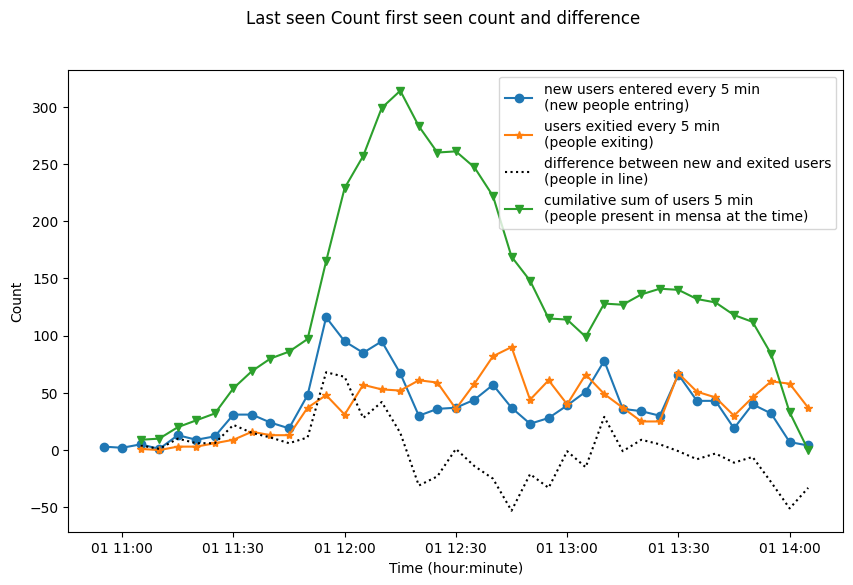

In [16]:
plt.figure(figsize=(10,6))
plt.plot(_5min_new_['count'], marker='o',label="new users entered every 5 min\n(new people entring)")
plt.plot(last_per5min_['count'], marker='*',label="users exitied every 5 min\n(people exiting)")
plt.plot((_5min_new_['count']-last_per5min_['count']),color="black", linestyle=":",label="difference between new and exited users\n(people in line)")
plt.plot(((np.cumsum(_5min_new_['count'])-np.cumsum(last_per5min_['count']))), marker='v',label="cumilative sum of users 5 min\n(people present in mensa at the time)")
plt.xlabel('Time (hour:minute)')
plt.ylabel('Count')
plt.suptitle('Last seen Count first seen count and difference')
#plt.title("(the value of orange and blue lines are divided by 10 to make it comparable to difference)", fontsize="small")
plt.legend(loc="upper right")

difference between first and last seen time

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29040\1002702646.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_first["hour:minute"] = pd.to_datetime(df_first["hour:minute"])
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29040\1002702646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_first["hour:minute"] = pd.to_datetime(df_first["hour:minute"])
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_29040\1002702646.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
 

Text(0, 0.5, 'count')

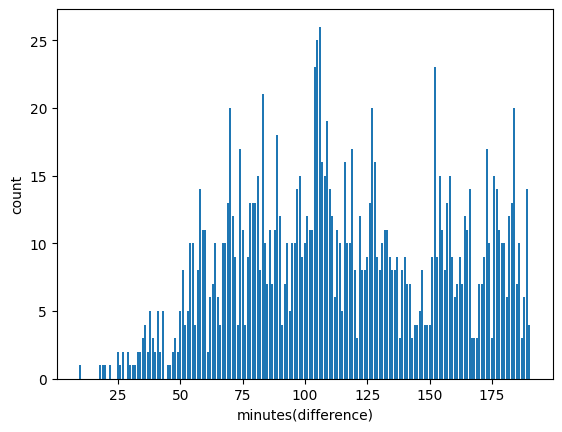

In [17]:
df_first["hour:minute"] = pd.to_datetime(df_first["hour:minute"])
df_last["hour:minute"] = pd.to_datetime(df_last["hour:minute"])
diff=[]

for i in df_first["wlan.sa"]:
    if (i==df_last["wlan.sa"]).any:
 
        index_last = df_last.index[df_last["wlan.sa"] == i][0]
        
        # Calculate the time difference between corresponding rows in minutes
        time_diff = (df_first.at[df_first.index[0], "hour:minute"] - df_last.at[index_last, "hour:minute"]).total_seconds() / (-60)
        # Append the wlan.sa value and time difference in minutes to the result list
        diff.append({"wlan.sa": i, "time_difference": time_diff})
        
diff_df=pd.DataFrame(diff)
diff_df.drop_duplicates(subset='wlan.sa', keep='first')
time_diff=diff_df["time_difference"].value_counts().sort_index()
plt.bar(x=time_diff.index,height=time_diff)
plt.xlabel("minutes(difference)")
plt.ylabel("count")


see how long a person stays in the mensa network

below is the histogram along with the violinplot showing how the average time spent at mensa is distributed

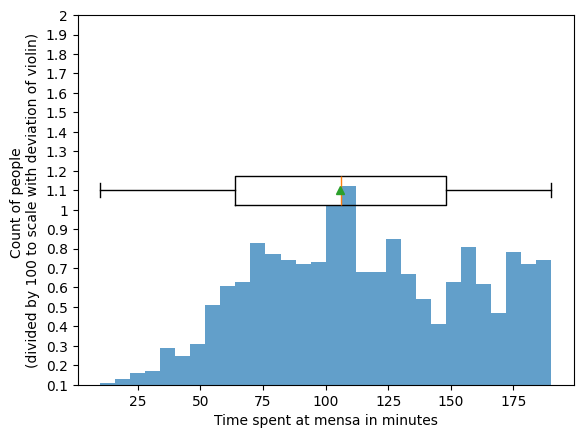

In [45]:
plt.hist(time_diff.index, weights=time_diff/100, bins=30, alpha=0.7)
plt.boxplot(time_diff.index, vert=False, showmeans=True)
plt.xlabel("Time spent at mensa in minutes")
plt.ylabel("Count of people \n(divided by 100 to scale with deviation of violin)")
plt.yticks(np.arange(0,2 , step=.1),labels=(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2))
plt.show()

In [ ]:
'''    diff_df["time_difference"].sort_values( ascending=False)
    diff_df.drop_duplicates(subset='wlan.sa', keep='first')
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,)
    ax1.hist(time_diff.index, weights=time_diff, bins=20)
    ax2.violinplot(time_diff.index, showmeans=True)
    fig.text(0.5, 0.04, 'X-axis Label', ha='center')
    fig.text(0.04, 0.5, 'Y-axis Label', va='center', rotation='vertical')
    fig.subplots_adjust(wspace=0, hspace=0)

    plt.show()'''

'    diff_df["time_difference"].sort_values( ascending=False)\n    diff_df.drop_duplicates(subset=\'wlan.sa\', keep=\'first\')\n    fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True,)\n    ax1.hist(time_diff.index, weights=time_diff, bins=20)\n    ax2.violinplot(time_diff.index, showmeans=True)\n    fig.text(0.5, 0.04, \'X-axis Label\', ha=\'center\')\n    fig.text(0.04, 0.5, \'Y-axis Label\', va=\'center\', rotation=\'vertical\')\n    fig.subplots_adjust(wspace=0, hspace=0)\n\n    plt.show()'